In [24]:
import xml.etree.ElementTree as ET

# Cargar y analizar el archivo XML
tree = ET.parse('xmls2023/sumario-20230102.xml')
root = tree.getroot()

In [25]:
# Acceder a children
for child in root:
    print(child)
    print(child.tag, child.attrib)
    if child.tag == 'meta':
        for subchild in child:
            print(subchild.tag, subchild.attrib, subchild.text)

<Element 'meta' at 0x1276758f0>
meta {}
pub {} BOE
anno {} 2023
fecha {} 02/01/2023
fechaInv {} 2023/01/02
fechaAnt {} 31/12/2022
fechaAntAnt {} 30/12/2022
fechaSig {} 03/01/2023
fechaPub {} lunes 2 de enero de 2023
pubDate {} Mon, 02 Jan 2023 00:00:00 +0100
<Element 'diario' at 0x1276fefc0>
diario {'nbo': '1'}


findall encuentra elementos que sean hijos directos del elemento actual. root viene de la tag principal <sumario> asi que no lo encontrara.

In [26]:
for elto in root.findall('departamento'):
    print(elto)

Tenemos que acceder a seccion

In [27]:
root_diario_list = root.findall('diario')
if len(root_diario_list) == 1:
    root_diario = root_diario_list[0]
    print(root_diario.tag, root_diario.attrib)
    for elto in root_diario.findall('departamento'):
        print("More than one diario element found")

diario {'nbo': '1'}


In [28]:
departamentos = []
for elto in root_diario:
    # If the element is "seccion" then we have to go deeper
    if elto.tag == 'seccion':
        for elto2 in elto:
            # We create a list with "nombres" in tags "departamento"
            if elto2.tag == 'departamento':
                departamentos.append(elto2.attrib['nombre'])
    else:
        print(elto.tag, elto.attrib, elto.text)

sumario_nbo {'id': 'BOE-S-2023-1'} 
      


Hemos conseguido una lista de todos los departamentos mencionados en el BOE del 2023/01/02

In [29]:
departamentos

['MINISTERIO DE ASUNTOS EXTERIORES, UNIÓN EUROPEA Y COOPERACIÓN',
 'MINISTERIO DE TRANSPORTES, MOVILIDAD Y AGENDA URBANA',
 'MINISTERIO DE TRABAJO Y ECONOMÍA SOCIAL',
 'MINISTERIO DE LA PRESIDENCIA, RELACIONES CON LAS CORTES Y MEMORIA DEMOCRÁTICA',
 'MINISTERIO DE INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES',
 'MINISTERIO DE UNIVERSIDADES',
 'MINISTERIO DE DEFENSA',
 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA',
 'MINISTERIO DEL INTERIOR',
 'MINISTERIO DE TRANSPORTES, MOVILIDAD Y AGENDA URBANA',
 'MINISTERIO DE TRABAJO Y ECONOMÍA SOCIAL',
 'MINISTERIO DE LA PRESIDENCIA, RELACIONES CON LAS CORTES Y MEMORIA DEMOCRÁTICA',
 'MINISTERIO DE POLÍTICA TERRITORIAL',
 'MINISTERIO DE ASUNTOS ECONÓMICOS Y TRANSFORMACIÓN DIGITAL',
 'MINISTERIO DE CIENCIA E INNOVACIÓN',
 'MINISTERIO DE IGUALDAD',
 'MINISTERIO DE INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES',
 'TRIBUNAL DE CUENTAS',
 'ADMINISTRACIÓN LOCAL',
 'MINISTERIO DE ASUNTOS EXTERIORES, UNIÓN EUROPEA Y COOPERACIÓN',
 'MINISTERIO DE JUSTICIA',
 'MINIST

Hagamalos con todos los archivos xml

In [30]:
import os
import xml.etree.ElementTree as ET

# Ruta a la carpeta que contiene los archivos XML
folder_path = 'xmls2023/'

# Diccionario para almacenar los nombres de los departamentos por archivo
departamentos_por_archivo = {}

# Lista todos los archivos en la carpeta especificada
for filename in os.listdir(folder_path):
    if filename.endswith('.xml'):
        # Construye la ruta completa al archivo XML
        full_path = os.path.join(folder_path, filename)
        
        # Analiza el archivo XML
        tree = ET.parse(full_path)
        root = tree.getroot()
        
        # Lista para almacenar los nombres de los departamentos de este archivo
        departamentos = []
        
        # Encuentra todos los elementos 'diario'. Suponemos que solo hay uno por archivo
        for diario in root.findall('diario'):
            for seccion in diario.findall('seccion'):
                for departamento in seccion.findall('departamento'):
                    # Agrega el nombre del departamento a la lista, si tiene el atributo 'nombre'
                    if 'nombre' in departamento.attrib:
                        departamentos.append(departamento.attrib['nombre'])
        
        # Guarda la lista de departamentos en el diccionario, usando el nombre del archivo como clave
        departamentos_por_archivo[filename] = departamentos

# Imprime el diccionario para verificar
for archivo, departamentos in departamentos_por_archivo.items():
    print(f"{archivo}: {departamentos}")


sumario-20230809.xml: ['MINISTERIO DE ASUNTOS EXTERIORES, UNIÓN EUROPEA Y COOPERACIÓN', 'MINISTERIO PARA LA TRANSICIÓN ECOLÓGICA Y EL RETO DEMOGRÁFICO', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DE POLÍTICA TERRITORIAL', 'MINISTERIO DE INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES', 'MINISTERIO FISCAL', 'UNIVERSIDADES', 'MINISTERIO DE ASUNTOS EXTERIORES, UNIÓN EUROPEA Y COOPERACIÓN', 'ADMINISTRACIÓN LOCAL', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DE TRANSPORTES, MOVILIDAD Y AGENDA URBANA', 'MINISTERIO DE INDUSTRIA, COMERCIO Y TURISMO', 'MINISTERIO DE AGRICULTURA, PESCA Y ALIMENTACIÓN', 'MINISTERIO DE CULTURA Y DEPORTE', 'MINISTERIO DE DERECHOS SOCIALES Y AGENDA 2030', 'BANCO DE ESPAÑA', 'CORTES GENERALES', 'MINISTERIO DE DEFENSA', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DEL INTERIOR', 'MINISTERIO DE TRANSPORTES, MOVILIDAD Y AGENDA URBANA', 'MINISTERIO DE TRABAJO Y ECONOMÍA SOCIAL', 'MINISTERIO PARA LA TRANSICIÓN ECOLÓGICA Y EL RETO DEMOGRÁFICO'

In [31]:
for filename, departamentos in departamentos_por_archivo.items():
    print(f"El numero de departamentos es {len(departamentos)} ")

El numero de departamentos es 38 
El numero de departamentos es 29 
El numero de departamentos es 68 
El numero de departamentos es 60 
El numero de departamentos es 45 
El numero de departamentos es 87 
El numero de departamentos es 45 
El numero de departamentos es 57 
El numero de departamentos es 43 
El numero de departamentos es 54 
El numero de departamentos es 57 
El numero de departamentos es 23 
El numero de departamentos es 44 
El numero de departamentos es 40 
El numero de departamentos es 66 
El numero de departamentos es 48 
El numero de departamentos es 63 
El numero de departamentos es 60 
El numero de departamentos es 0 
El numero de departamentos es 55 
El numero de departamentos es 27 
El numero de departamentos es 48 
El numero de departamentos es 0 
El numero de departamentos es 23 
El numero de departamentos es 51 
El numero de departamentos es 67 
El numero de departamentos es 62 
El numero de departamentos es 72 
El numero de departamentos es 49 
El numero de dep

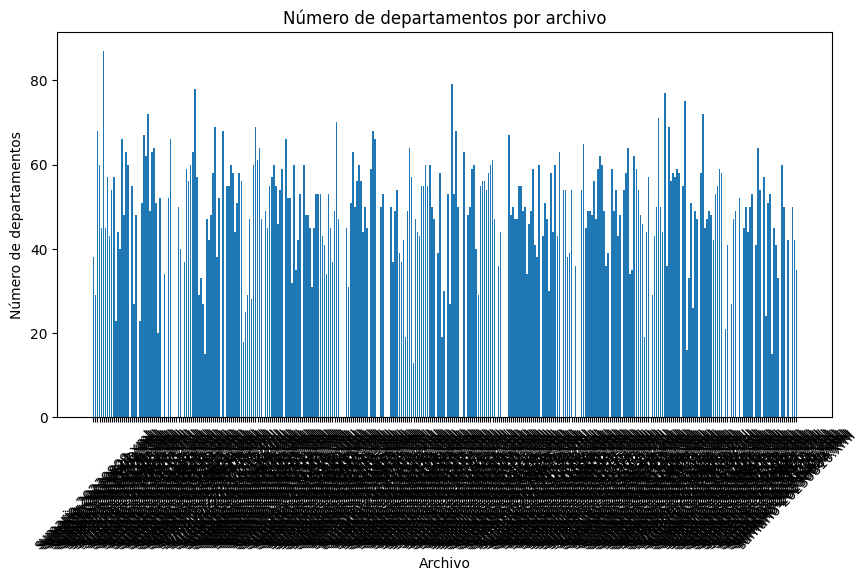

In [32]:
# Visualizar el numero de departamentos por archivo usando un histograma
import matplotlib.pyplot as plt

# Extrae los nombres de los archivos y el numero de departamentos
archivos = list(departamentos_por_archivo.keys())
num_departamentos = [len(departamentos) for departamentos in departamentos_por_archivo.values()]

# Crea un gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(archivos, num_departamentos)
plt.xlabel('Archivo')
plt.ylabel('Número de departamentos')
plt.title('Número de departamentos por archivo')
plt.xticks(rotation=45)
plt.show()


In [33]:
# Agrupar los archivos por semana y visualizar el numero de departamentos por semana
# Diccionario para almacenar los nombres de los departamentos por semana
departamentos_por_semana = {}

# Itera sobre los archivos y agrupa por semana

for filename, departamentos in departamentos_por_archivo.items():
    # Extrae la fecha del archivo
    fecha = filename.split('-')[1]
    
    # Extrae el año y la semana del año
    year = fecha[:4]
    week = fecha[4:]
    
    # Combina el año y la semana para obtener la clave de la semana
    semana = f"{year}-W{week}"
    
    # Si la clave de la semana no existe, crea una nueva lista
    if semana not in departamentos_por_semana:
        departamentos_por_semana[semana] = []
    
    # Agrega los departamentos a la lista correspondiente a la semana
    departamentos_por_semana[semana].extend(departamentos)

# Imprime el diccionario para verificar
for semana, departamentos in departamentos_por_semana.items():
    print(f"{semana}: {departamentos}")

2023-W0809.xml: ['MINISTERIO DE ASUNTOS EXTERIORES, UNIÓN EUROPEA Y COOPERACIÓN', 'MINISTERIO PARA LA TRANSICIÓN ECOLÓGICA Y EL RETO DEMOGRÁFICO', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DE POLÍTICA TERRITORIAL', 'MINISTERIO DE INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES', 'MINISTERIO FISCAL', 'UNIVERSIDADES', 'MINISTERIO DE ASUNTOS EXTERIORES, UNIÓN EUROPEA Y COOPERACIÓN', 'ADMINISTRACIÓN LOCAL', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DE TRANSPORTES, MOVILIDAD Y AGENDA URBANA', 'MINISTERIO DE INDUSTRIA, COMERCIO Y TURISMO', 'MINISTERIO DE AGRICULTURA, PESCA Y ALIMENTACIÓN', 'MINISTERIO DE CULTURA Y DEPORTE', 'MINISTERIO DE DERECHOS SOCIALES Y AGENDA 2030', 'BANCO DE ESPAÑA', 'CORTES GENERALES', 'MINISTERIO DE DEFENSA', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DEL INTERIOR', 'MINISTERIO DE TRANSPORTES, MOVILIDAD Y AGENDA URBANA', 'MINISTERIO DE TRABAJO Y ECONOMÍA SOCIAL', 'MINISTERIO PARA LA TRANSICIÓN ECOLÓGICA Y EL RETO DEMOGRÁFICO', 'MIN

In [34]:
# Calcula el número de departamentos por semana
num_departamentos_semana = {semana: len(departamentos) for semana, departamentos in departamentos_por_semana.items()}
num_departamentos_semana

{'2023-W0809.xml': 38,
 '2023-W0821.xml': 29,
 '2023-W0612.xml': 68,
 '2023-W0606.xml': 60,
 '2023-W0410.xml': 45,
 '2023-W0404.xml': 87,
 '2023-W0202.xml': 45,
 '2023-W0216.xml': 57,
 '2023-W1108.xml': 43,
 '2023-W1120.xml': 54,
 '2023-W1121.xml': 57,
 '2023-W1109.xml': 23,
 '2023-W0217.xml': 44,
 '2023-W0203.xml': 40,
 '2023-W0405.xml': 66,
 '2023-W0411.xml': 48,
 '2023-W0607.xml': 63,
 '2023-W0613.xml': 60,
 '2023-W0820.xml': 0,
 '2023-W0808.xml': 55,
 '2023-W0822.xml': 27,
 '2023-W0605.xml': 48,
 '2023-W0611.xml': 0,
 '2023-W0407.xml': 23,
 '2023-W0413.xml': 51,
 '2023-W0215.xml': 67,
 '2023-W0201.xml': 62,
 '2023-W1123.xml': 72,
 '2023-W1122.xml': 49,
 '2023-W0228.xml': 63,
 '2023-W0214.xml': 64,
 '2023-W0412.xml': 51,
 '2023-W0406.xml': 20,
 '2023-W0610.xml': 52,
 '2023-W0604.xml': 0,
 '2023-W0823.xml': 34,
 '2023-W0827.xml': 0,
 '2023-W0628.xml': 52,
 '2023-W0614.xml': 66,
 '2023-W0402.xml': 0,
 '2023-W0416.xml': 0,
 '2023-W1126.xml': 0,
 '2023-W0210.xml': 50,
 '2023-W0204.xml':

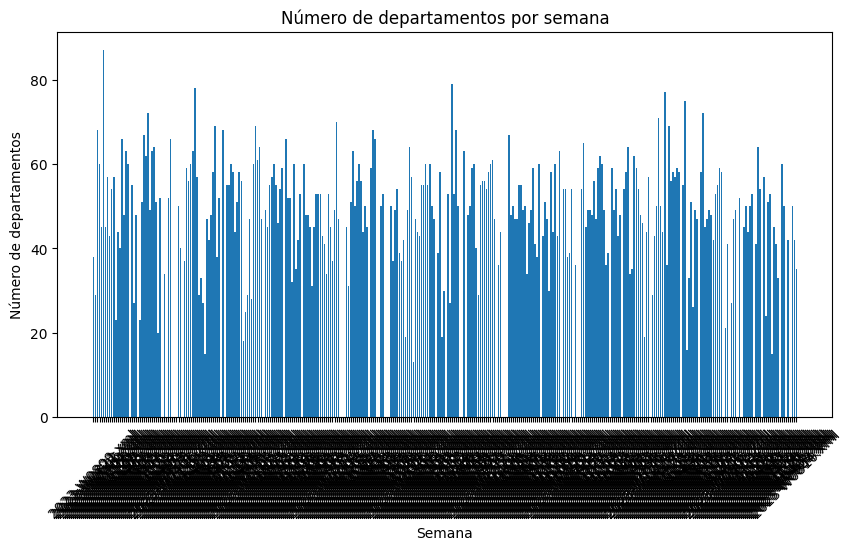

In [35]:
# Crea un gráfico de barras para visualizar el número de departamentos por semana
plt.figure(figsize=(10, 5))
plt.bar(num_departamentos_semana.keys(), num_departamentos_semana.values())
plt.xlabel('Semana')
plt.ylabel('Número de departamentos')
plt.title('Número de departamentos por semana')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Igual por mes
# Diccionario para almacenar los nombres de los departamentos por mes
departamentos_por_mes = {}

# Itera sobre los archivos y agrupa por mes
for filename, departamentos in departamentos_por_archivo.items():
    # Extrae la fecha del archivo
    fecha = filename.split('-')[1]
    
    # Extrae el año y el mes
    year = fecha[:4]
    month = fecha[4:6]
    
    # Combina el año y el mes para obtener la clave del mes
    mes = f"{year}-{month}"
    
    # Si la clave del mes no existe, crea una nueva lista
    if mes not in departamentos_por_mes:
        departamentos_por_mes[mes] = []
    
    # Agrega los departamentos a la lista correspondiente al mes
    departamentos_por_mes[mes].extend(departamentos)

# Imprime el diccionario para verificar
for mes, departamentos in departamentos_por_mes.items():
    print(f"{mes}: {departamentos}")

# Calcula el número de departamentos por mes
num_departamentos_mes = {mes: len(departamentos) for mes, departamentos in departamentos_por_mes.items()}
num_departamentos_mes

2023-08: ['MINISTERIO DE ASUNTOS EXTERIORES, UNIÓN EUROPEA Y COOPERACIÓN', 'MINISTERIO PARA LA TRANSICIÓN ECOLÓGICA Y EL RETO DEMOGRÁFICO', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DE POLÍTICA TERRITORIAL', 'MINISTERIO DE INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES', 'MINISTERIO FISCAL', 'UNIVERSIDADES', 'MINISTERIO DE ASUNTOS EXTERIORES, UNIÓN EUROPEA Y COOPERACIÓN', 'ADMINISTRACIÓN LOCAL', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DE TRANSPORTES, MOVILIDAD Y AGENDA URBANA', 'MINISTERIO DE INDUSTRIA, COMERCIO Y TURISMO', 'MINISTERIO DE AGRICULTURA, PESCA Y ALIMENTACIÓN', 'MINISTERIO DE CULTURA Y DEPORTE', 'MINISTERIO DE DERECHOS SOCIALES Y AGENDA 2030', 'BANCO DE ESPAÑA', 'CORTES GENERALES', 'MINISTERIO DE DEFENSA', 'MINISTERIO DE HACIENDA Y FUNCIÓN PÚBLICA', 'MINISTERIO DEL INTERIOR', 'MINISTERIO DE TRANSPORTES, MOVILIDAD Y AGENDA URBANA', 'MINISTERIO DE TRABAJO Y ECONOMÍA SOCIAL', 'MINISTERIO PARA LA TRANSICIÓN ECOLÓGICA Y EL RETO DEMOGRÁFICO', 'MINISTERIO

{'2023-08': 930,
 '2023-06': 1446,
 '2023-04': 1275,
 '2023-02': 1277,
 '2023-11': 1321,
 '2023-01': 1153,
 '2023-12': 586,
 '2023-03': 1479,
 '2023-10': 1289,
 '2023-05': 1362,
 '2023-09': 1122,
 '2023-07': 1451}

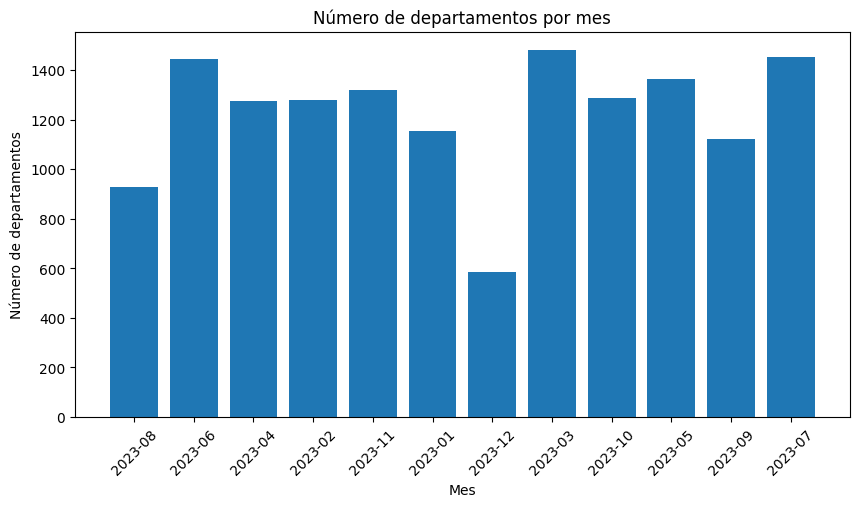

In [37]:
# Crea un gráfico de barras para visualizar el número de departamentos por mes
plt.figure(figsize=(10, 5))
plt.bar(num_departamentos_mes.keys(), num_departamentos_mes.values())
plt.xlabel('Mes')
plt.ylabel('Número de departamentos')
plt.title('Número de departamentos por mes')
plt.xticks(rotation=45)
plt.show()

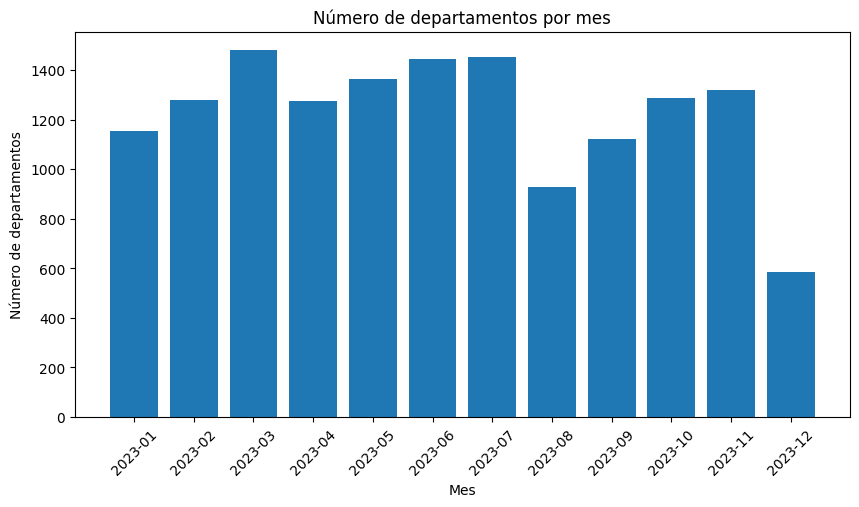

In [38]:
# Ordena los meses por año y mes
meses_ordenados = sorted(num_departamentos_mes.keys())
num_departamentos_ordenados = [num_departamentos_mes[mes] for mes in meses_ordenados]

# Crea un gráfico de barras para visualizar el número de departamentos por mes, ordenado
plt.figure(figsize=(10, 5))
plt.bar(meses_ordenados, num_departamentos_ordenados)
plt.xlabel('Mes')
plt.ylabel('Número de departamentos')
plt.title('Número de departamentos por mes')
plt.xticks(rotation=45)
plt.show()

Ahora extraemos todos los BOE

In [39]:
import os
import xml.etree.ElementTree as ET

# Ruta de la carpeta que contiene los archivos XML
xml_folder_path = 'xmls'

# Diccionario para almacenar los nombres de los departamentos por año
departamentos_por_año = {}

# Iterar sobre cada archivo en la carpeta de XMLs
for file in os.listdir(xml_folder_path):
    if file.endswith('.xml'):
        # Construir la ruta completa al archivo
        file_path = os.path.join(xml_folder_path, file)
        
        # Parsear el XML
        tree = ET.parse(file_path)
        root = tree.getroot()
        
        # Asumiendo que 'diario' es el nodo raíz como en el ejemplo dado anteriormente
        root_diario = root.find('diario')
        
        departamentos = []
        if root_diario is not None:
            for elto in root_diario.iter('departamento'):
                departamentos.append(elto.attrib['nombre'])
        
        # Extrae el año del nombre del archivo, asumiendo que sigue un patrón como 'sumario-AAAAMMDD.xml'
        año = file.split('-')[1][:4]
        
        # Si el año no existe en el diccionario, inicializa una lista vacía
        if año not in departamentos_por_año:
            departamentos_por_año[año] = []
        
        # Agrega los departamentos a la lista correspondiente al año, evitando duplicados
        departamentos_por_año[año].extend(list(set(departamentos) - set(departamentos_por_año[año])))

# Imprimir el resultado para verificación
for año, departamentos in departamentos_por_año.items():
    print(f"Año: {año}, Número de Departamentos: {len(departamentos)}")


Año: 2015, Número de Departamentos: 69
Año: 2012, Número de Departamentos: 77
Año: 2013, Número de Departamentos: 74
Año: 2020, Número de Departamentos: 86
Año: 2021, Número de Departamentos: 82
Año: 2023, Número de Departamentos: 89
Año: 2002, Número de Departamentos: 57
Año: 2018, Número de Departamentos: 90
Año: 2003, Número de Departamentos: 58
Año: 2005, Número de Departamentos: 66
Año: 2024, Número de Departamentos: 88
Año: 2008, Número de Departamentos: 74
Año: 2017, Número de Departamentos: 76
Año: 2016, Número de Departamentos: 76
Año: 2006, Número de Departamentos: 67
Año: 2007, Número de Departamentos: 65
Año: 2022, Número de Departamentos: 76
Año: 2009, Número de Departamentos: 75
Año: 2011, Número de Departamentos: 78
Año: 2001, Número de Departamentos: 60
Año: 2019, Número de Departamentos: 82
Año: 2014, Número de Departamentos: 72
Año: 2004, Número de Departamentos: 75
Año: 2000, Número de Departamentos: 61
Año: 2010, Número de Departamentos: 74


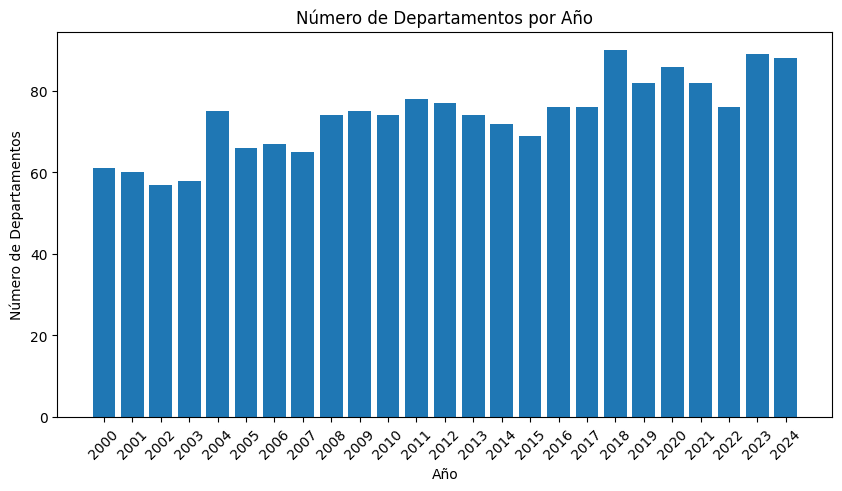

In [40]:
# Visualizar el número de departamentos por año
import matplotlib.pyplot as plt

# Extraer los años y el número de departamentos
años = list(departamentos_por_año.keys())
num_departamentos = [len(departamentos) for departamentos in departamentos_por_año.values()]

# ordenar los años
años_ordenados = sorted(años)
num_departamentos_ordenados = [num_departamentos[años.index(año)] for año in años_ordenados]

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(años_ordenados, num_departamentos_ordenados)
plt.xlabel('Año')
plt.ylabel('Número de Departamentos')
plt.title('Número de Departamentos por Año')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Imprimir el resultado para verificación
ordenados = dict(zip(años_ordenados, num_departamentos_ordenados))
for año, departamentos in ordenados.items():
    print(f"Año: {año}, Número de Departamentos: {departamentos}")

Año: 2000, Número de Departamentos: 61
Año: 2001, Número de Departamentos: 60
Año: 2002, Número de Departamentos: 57
Año: 2003, Número de Departamentos: 58
Año: 2004, Número de Departamentos: 75
Año: 2005, Número de Departamentos: 66
Año: 2006, Número de Departamentos: 67
Año: 2007, Número de Departamentos: 65
Año: 2008, Número de Departamentos: 74
Año: 2009, Número de Departamentos: 75
Año: 2010, Número de Departamentos: 74
Año: 2011, Número de Departamentos: 78
Año: 2012, Número de Departamentos: 77
Año: 2013, Número de Departamentos: 74
Año: 2014, Número de Departamentos: 72
Año: 2015, Número de Departamentos: 69
Año: 2016, Número de Departamentos: 76
Año: 2017, Número de Departamentos: 76
Año: 2018, Número de Departamentos: 90
Año: 2019, Número de Departamentos: 82
Año: 2020, Número de Departamentos: 86
Año: 2021, Número de Departamentos: 82
Año: 2022, Número de Departamentos: 76
Año: 2023, Número de Departamentos: 89
Año: 2024, Número de Departamentos: 88


In [42]:
import os
import xml.etree.ElementTree as ET

# Path to the folder containing XML files
xml_folder_path = 'xmls'

# Dictionary to store the count of PDFs published per month
pdfs_per_month = {}

# Iterate through each file in the specified folder
for filename in os.listdir(xml_folder_path):
    if filename.endswith('.xml'):  # Check if the file is an XML file
        file_path = os.path.join(xml_folder_path, filename)
        
        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()
        
        # Extract the publication date from the <fecha> tag
        pub_date_element = root.find('.//meta/fecha')
        
        if pub_date_element is not None:
            pub_date = pub_date_element.text
            month = pub_date.split('/')[1]  # Extract month from format 'DD/MM/YYYY'
            year = pub_date.split('/')[2]  # Extract year to distinguish between same months of different years
            
            # Create a unique key for the dictionary as 'YYYY-MM'
            month_year = f"{year}-{month}"

            # Find all <urlPdf> tags and count them
            pdf_count = len(root.findall('.//urlPdf'))

            # Update the dictionary with the count of PDFs for the extracted month and year
            if month_year in pdfs_per_month:
                pdfs_per_month[month_year] += pdf_count
            else:
                pdfs_per_month[month_year] = pdf_count
        else:
            print(f"Warning: <fecha> tag missing in file {filename}")

# Print the result
for month_year, count in pdfs_per_month.items():
    print(f"Month-Year: {month_year}, PDFs Published: {count}")


In [ ]:
pdfs_per_month

{'2012-10': 5676,
 '2013-12': 5266,
 '2021-05': 8442,
 '2023-08': 3127,
 '2002-03': 4471,
 '2018-08': 2961,
 '2003-12': 4816,
 '2002-10': 5606,
 '2005-08': 4211,
 '2020-07': 7015,
 '2024-03': 6712,
 '2008-08': 4186,
 '2012-03': 5675,
 '2017-05': 8200,
 '2016-07': 6572,
 '2003-01': 4364,
 '2006-07': 5562,
 '2007-05': 5472,
 '2020-09': 6319,
 '2022-04': 5362,
 '2023-06': 5929,
 '2009-04': 5917,
 '2011-11': 5605,
 '2016-09': 7097,
 '2001-11': 5384,
 '2001-02': 5388,
 '2019-04': 6761,
 '2006-09': 4515,
 '2011-02': 5816,
 '2015-06': 4743,
 '2008-06': 4538,
 '2014-04': 5053,
 '2004-04': 4731,
 '2005-06': 5310,
 '2018-06': 7579,
 '2002-12': 4695,
 '2003-10': 5158,
 '2003-03': 4932,
 '2004-08': 3627,
 '2019-08': 3628,
 '2022-08': 3645,
 '2021-07': 5203,
 '2020-05': 2070,
 '2017-07': 7597,
 '2009-08': 4038,
 '2013-10': 6216,
 '2012-12': 5101,
 '2014-08': 3528,
 '2013-03': 5249,
 '2024-01': 5170,
 '2006-05': 4950,
 '2016-05': 7320,
 '2002-01': 4517,
 '2007-09': 3772,
 '2000-02': 6324,
 '2000-11'

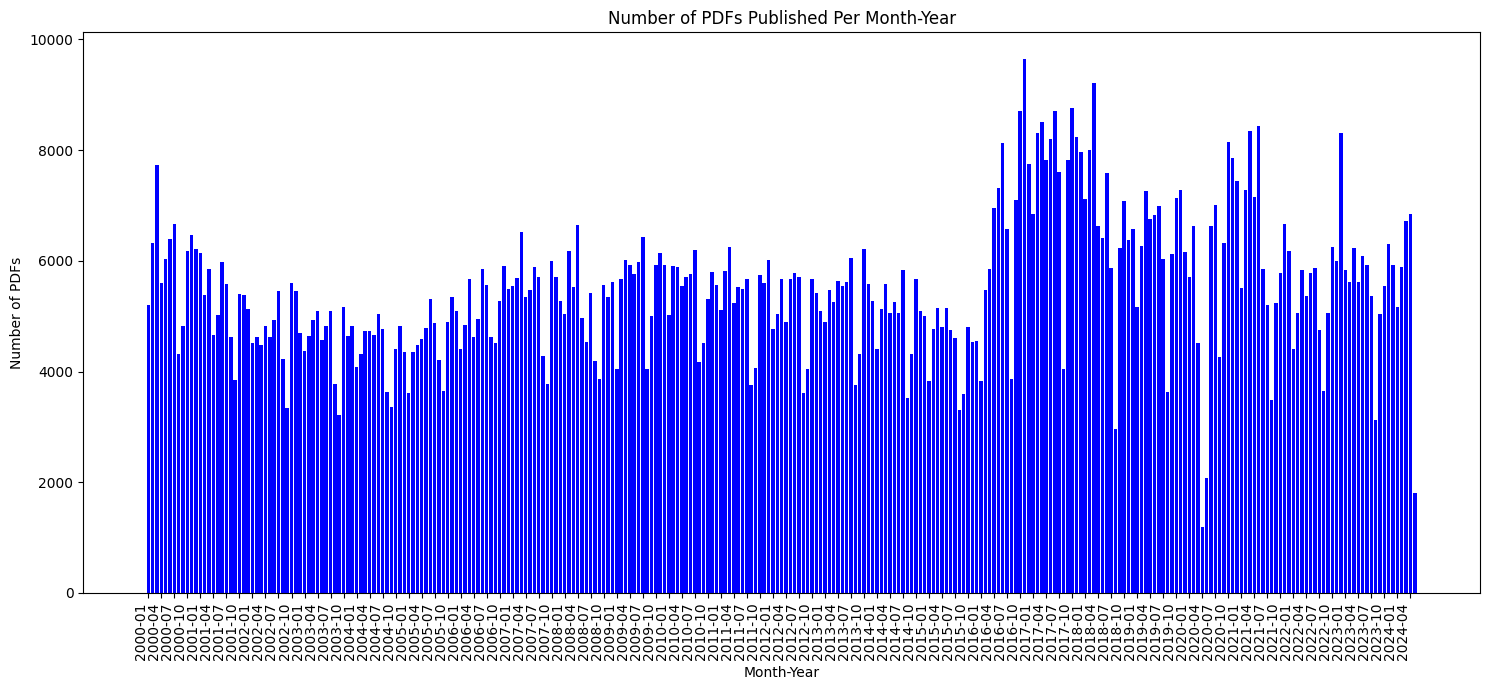

In [ ]:
import matplotlib.pyplot as plt

# Convert 'YYYY-MM' to tuples (year, month) for correct chronological sorting
sorted_months = sorted(pdfs_per_month.keys(), key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))
pdf_counts = [pdfs_per_month[month] for month in sorted_months]

# Creating a bar chart with increased readability
plt.figure(figsize=(15, 7))  # You can adjust the figure size to fit your screen or preferences
plt.bar(sorted_months, pdf_counts, color='blue')
plt.xlabel('Month-Year')
plt.ylabel('Number of PDFs')
plt.title('Number of PDFs Published Per Month-Year')
plt.xticks(rotation=90, ha='right')  # Rotate labels for better fit

# Display every 3rd label on the x-axis for better readability
plt.gca().set_xticks(plt.gca().get_xticks()[::3])  # This adjusts the frequency of the labels

plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [ ]:
import numpy as np

# Calculate the moving average using a window of 12 months
window_size = 12
moving_avg = np.convolve(pdf_counts, np.ones(window_size)/window_size, mode='valid')

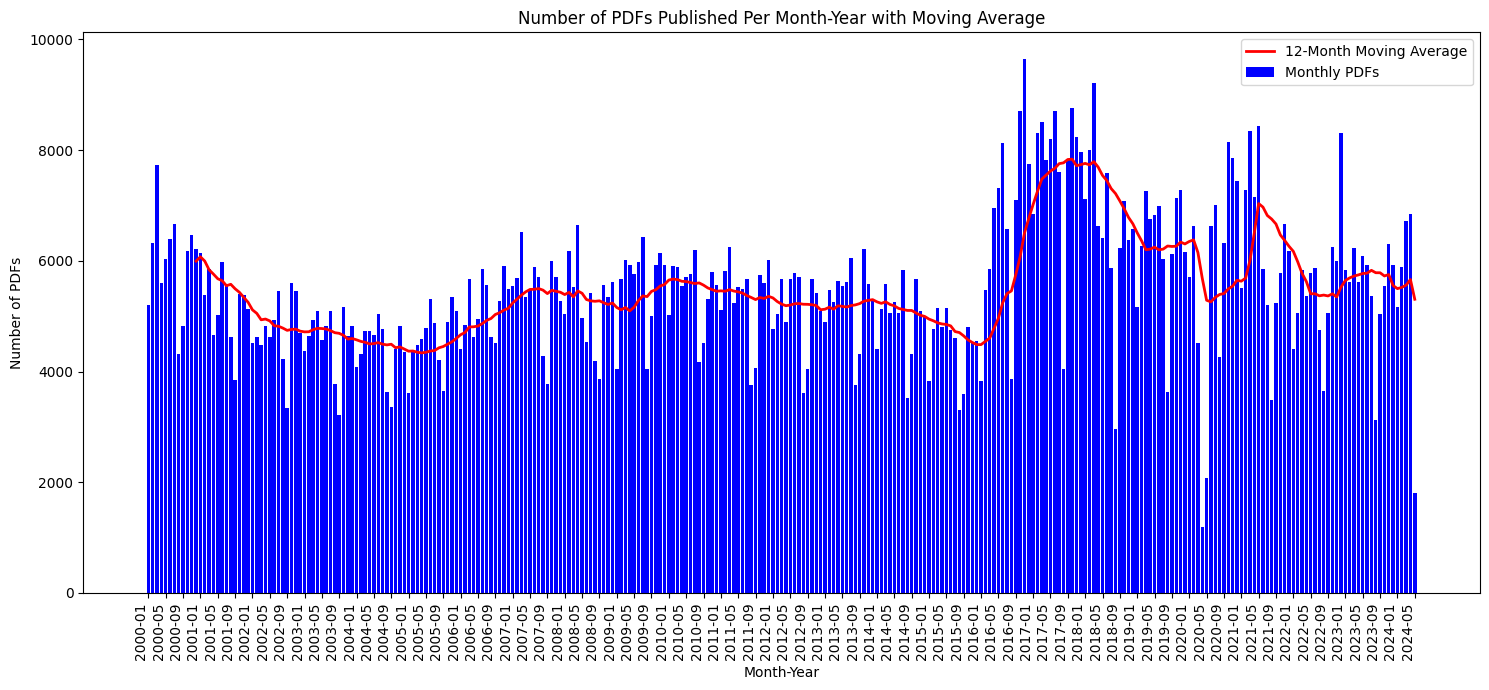

In [ ]:
import matplotlib.pyplot as plt

# Creating a bar chart with a moving average line
plt.figure(figsize=(15, 7))
plt.bar(sorted_months, pdf_counts, color='blue', label='Monthly PDFs')
plt.xlabel('Month-Year')
plt.ylabel('Number of PDFs')
plt.title('Number of PDFs Published Per Month-Year with Moving Average')

# Add the moving average plot
# Adjust x-values for the moving average to align with its length
valid_months = sorted_months[len(sorted_months) - len(moving_avg):]
plt.plot(valid_months, moving_avg, color='red', linewidth=2, label='12-Month Moving Average')

plt.xticks(rotation=90, ha='right')  # Rotate labels for better fit
plt.gca().set_xticks(plt.gca().get_xticks()[::4])  # Display every 4th label
plt.legend()  # Add a legend to distinguish plots
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()
